<a href="https://colab.research.google.com/github/Ryo-Neko/benkyokai2020/blob/master/%E7%A0%94%E7%A9%B6%E7%94%9F%E6%B4%BB%E3%82%92%E7%94%9F%E3%81%8D%E5%BB%B6%E3%81%B3%E3%82%8B%E3%81%9F%E3%82%81%E3%81%AE%E5%8B%89%E5%BC%B7%E4%BC%9Apart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# おすすめ
わからなかったらとりあえず調べる。これが鉄則です。覚える必要はないです。私もよく使うもの以外はすぐ忘れます。。。

# ライブラリーの読み込み
"#"以下はココメント文になります。コメント文はプログラムとして認識されないので好き勝手書くことができます。

例

```python

a = 3 + 2 # うんこうんこうんこうんこうんこうんこうんこうんこうんこ
print(a) # ＼(^o^)/

```
この場合、aの値（この場合は5）のみが出力されエラーにはなりません。
くれぐれも見られて恥ずかしい言葉を書かないようにしましょう。


In [1]:
# !からはじまるコマンドは、シェルのコマンドの一つです（Pythonではない）。参考：シェル、　pip
!pip install japanize_matplotlib # 図面が文字化け（豆腐化）しなくなる

     |████████████████████████████████| 4.1MB 3.3MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp36-none-any.whl size=4118721 sha256=72b515fb8fbb0e1286bdeef32bf169249d1252ab58764824bb9d09eb90edd9bc
  Stored in directory: /root/.cache/pip/wheels/6c/8a/08/4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


In [2]:
# 以下、調べて見るとできることがわかるのでオススメです。

import pandas as pd # Pythonでデータ解析をするならこれ！
import numpy as np # Pythonで数値計算するならこれ！!

import matplotlib.pyplot as plt # matplotlibはPythonで図面を書くときの基本
import seaborn as sns # seabornはmatplotlibを拡張して色んなことができるようにしたもの。便利だが個人的にはちょっと不便。楽しんで使いたいならオススメ。
import japanize_matplotlib # 上でインストールしたもの。

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/__init__.py:13: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


# データの読み込み

In [29]:
df = pd.read_csv("/content/drive/My Drive/datasets/signate/covid19/罹患者.csv", header=0, index_col=None) # 適宜ファイルの場所は変更しましょう
df.head(3)

,罹患者id,都道府県コード,都道府県別罹患者No,発熱観察日,受診日,公表日,回復日,死亡日,受診都道府県,受診都道府県緯度,受診都道府県経度,居住地,居住地緯度,居住地経度,年代,性別,職業,海外渡航歴ﾌﾗｸﾞ,海外渡航先,帰国日,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,症状・経過,行動歴,濃厚接触者状況,情報源,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,1-1,1.0,1.0,2020/01/26,2020/01/27,2020/01/28,NaN,NaN,北海道,#NAME?,#NAME?,中国（武漢市）,#NAME?,#NAME?,40代,女性,NaN,1,NaN,NaN,0.0,1月21日に来日し、22日より北海道を観光。\n1月26日 体調不良のため外出せず。夜間に咳...,1月21日、２名で来日し東京都内の知人宅に宿泊。\n1月22日、３名で東京から北海道に移動し...,濃厚接触者を特定し\n健康観察終了,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1-2,1.0,2.0,2020/01/31,2020/02/03,2020/02/14,NaN,NaN,北海道,#NAME?,#NAME?,札幌市,#NAME?,#NAME?,50代,男性,自営業,0,NaN,NaN,0.0,1月31日 発熱、咳、倦怠感が出現。\n2月 3日 石狩振興局管内の医療機関Aを受診。\n2...,1月21日、２名で来日し東京都内の知人宅に宿泊。\n1月22日、３名で東京から北海道に移動し...,健康観察実施中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1-3,1.0,3.0,2020/02/12,2020/02/15,2020/02/19,NaN,NaN,北海道,#NAME?,#NAME?,札幌市,#NAME?,#NAME?,40代,男性,会社員,0,NaN,NaN,0.0,2月 8日 倦怠感、筋肉痛、関節痛が出現\n2月12日 発熱、咳が出現\n2月13日 札幌市...,2月1日から2月12日までの期間、No.5の男性（2月19日感染判明）とともに、雪まつり大通...,札幌市公表中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_info = pd.read_csv("/content/drive/My Drive/datasets/signate/covid19/罹患者関係.csv", header=0, index_col=None)
df_info.head(3)

,罹患者id1,罹患者id2,関係性,都道府県,場所,場所緯度,場所経度,情報源
0,1-3,1-5,不明,兵庫県,さっぽろ雪まつり,#NAME?,#NAME?,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
1,28-5,20-2,不明,兵庫県,Soap opera classics-Umeda,NaN,NaN,https://www.city.himeji.lg.jp/emergencyinfo/cm...
2,28-24,20-2,不明,兵庫県,Soap opera classics-Umeda,NaN,NaN,https://www.city.kobe.lg.jp/a57337/kenko/healt...


# データの整理

In [0]:
# Excelのエラーである"#NAME?"(数式のエラー？)をnanに置き換えます。
df = df.replace("#NAME?", np.nan)
df_info = df_info.replace("#NAME?", np.nan)

In [0]:
# 行方向に全てNaNの行を削除
# axis=0は削除が行方向なことを意味します。
# inplace=Trueは、いちいち再代入しなくてもdfを上書きすることを意味します（これはわからなければスルーでOKです）
df.dropna(how='all', axis=0, inplace=True)
df_info.dropna(how='all', axis=0, inplace=True)


# 列方向に全てNaNの列を削除
# axis=1は削除が列方向なことを意味します。
df.dropna(how='all', axis=1, inplace=True)
df_info.dropna(how='all', axis=1, inplace=True)

In [56]:
# idがnanの場合は今回は扱わないことに（罹患者数が変わるので本当はいけないがmergeの便宜上）
df = df[~df['罹患者id'].isnull()] # "isnull()" は"ＮａＮ"を探します。"~"(チルダ)は"not"を意味します。 疑問な人はdf['罹患者id'].isnull()を他のウィンドウでやって出力を確認しましょう。.
df_info = df_info[~df_info['罹患者id1'].isnull()]
df.tail()

,罹患者id,都道府県コード,都道府県別罹患者No,発熱観察日,受診日,公表日,回復日,死亡日,受診都道府県,受診都道府県緯度,受診都道府県経度,居住地,年代,性別,職業,海外渡航歴ﾌﾗｸﾞ,海外渡航先,帰国日,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,症状・経過,行動歴,濃厚接触者状況,情報源
926,45-2,45.0,2.0,2020/03/15,2020/03/16,2020/03/17,NaN,NaN,宮崎県,NaN,NaN,国外,20代,男性,会社員,1,NaN,NaN,0.0,3月15日\n37.5度の発熱と咳嗽あり。解熱剤使用。\n3月16日\n39度の発熱継続する...,3月12日\n国外を出発。\n3月13日\n成田空港到着後東京滞在。\n3月15日\n横浜市...,友人1人（経過観察期間：3月31日まで）\n3月18日PCR検査陰性\n現在症状なし\nレン...,https://www.pref.miyazaki.lg.jp/kohosenryaku/k...
927,45-3,45.0,3.0,2020/03/07,2020/03/11,2020/03/17,NaN,NaN,宮崎県,NaN,NaN,高千穂町,40代,男性,郵便局員,0,NaN,NaN,0.0,3月7日\n37.5度の発熱、咳、節々の痛み、目と頭の痛み。\n3月9日\n39.1度の発熱...,3月5日\n熊本県訪問\n3月7日から\n自宅安静,・同居家族（妻）（経過観察期間：3月31日まで）\n 3月18日PCR検査陰性\n 現在症状...,https://www.pref.miyazaki.lg.jp/kohosenryaku/k...
928,47-1,47.0,1.0,2020/02/05,2020/02/12,2020/02/14,NaN,NaN,沖縄県,NaN,NaN,島尻郡,60代,女性,タクシー運転手,0,NaN,NaN,0.0,・２月１日 ：ダイヤモンドプリンセス号に乗船していた４名を乗車。\n・２月５日 ：咳がひどく...,調査中,調査中,https://www.pref.okinawa.jp/site/hoken/chiikih...
929,47-2,47.0,2.0,2020/02/10,2020/02/18,2020/02/19,NaN,NaN,沖縄県,NaN,NaN,那覇市,60代,男性,タクシー運転手,0,NaN,NaN,0.0,・２月１日 ：ダイヤモンドプリンセス号に乗船していた乗客を乗車。\n・２月 10 日 ：倦怠...,調査中,調査中,https://www.pref.okinawa.jp/site/hoken/chiikih...
930,47-3,47.0,3.0,2020/02/17,2020/02/20,2020/02/20,NaN,NaN,沖縄県,NaN,NaN,豊見城市,80代,男性,農業,0,NaN,NaN,0.0,・２月６日 ：微熱あり、咳なし、風邪気味。\n・２月 17 日 ：発熱 36.8 ℃、倦怠感...,調査中,調査中,https://www.pref.okinawa.jp/site/hoken/chiikih...


In [62]:
df_info[df_info["罹患者id1"].duplicated()]

,罹患者id1,罹患者id2,関係性,都道府県,場所,情報源
13,1-17,1-43,不明,北海道,生活関連商品の展示会,http://www.pref.hokkaido.lg.jp/hf/kth/kak/sing...
20,1-27,1-31,不明,北海道,不明,http://www.pref.hokkaido.lg.jp/hf/kth/kak/sing...
22,1-28,1-41,不明,北海道,不明,http://www.pref.hokkaido.lg.jp/hf/kth/kak/kisy...
23,1-28,1-43,不明,北海道,生活関連商品の展示会,http://www.pref.hokkaido.lg.jp/hf/kth/kak/sing...
24,1-28,1-72,不明,北海道,不明,http://www.pref.hokkaido.lg.jp/hf/kth/kak/sing...
...,...,...,...,...,...,...
436,27-76,27-5,ライブハウス滞在 (2/19 Soap opera classics -Umeda),大阪府,ライブハウスSoap opera classics –Umeda,http://www.pref.osaka.lg.jp/hodo/attach/hodo-3...
437,27-77,27-46,濃厚接触者,大阪府,不明,http://www.pref.osaka.lg.jp/hodo/attach/hodo-3...
438,27-77,27-5,ライブハウス滞在 (2/19 Soap opera classics -Umeda),大阪府,ライブハウスSoap opera classics –Umeda,http://www.pref.osaka.lg.jp/hodo/attach/hodo-3...
440,27-80,27-12,ライブハウス滞在 (2/18 Live House Rumio),大阪府,ライブハウスLIVE HOUSE Rumio,http://www.pref.osaka.lg.jp/hodo/attach/hodo-3...


In [64]:
# この場合how="left"が正しそうです。 左のデータフレーム（今回はdf）に揃えます。
# 参考 -> https://qiita.com/hikaru_/items/e9c1356f674f2baa9e64
df_merge = pd.merge(left=df, right=df_info, how='left', left_on="罹患者id", right_on="罹患者id1")
df_merge

,罹患者id,都道府県コード,都道府県別罹患者No,発熱観察日,受診日,公表日,回復日,死亡日,受診都道府県,受診都道府県緯度,受診都道府県経度,居住地,年代,性別,職業,海外渡航歴ﾌﾗｸﾞ,海外渡航先,帰国日,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,症状・経過,行動歴,濃厚接触者状況,情報源_x,罹患者id1,罹患者id2,関係性,都道府県,場所,情報源_y
0,1-1,1.0,1.0,2020/01/26,2020/01/27,2020/01/28,NaN,NaN,北海道,NaN,NaN,中国（武漢市）,40代,女性,NaN,1,NaN,NaN,0.0,1月21日に来日し、22日より北海道を観光。\n1月26日 体調不良のため外出せず。夜間に咳...,1月21日、２名で来日し東京都内の知人宅に宿泊。\n1月22日、３名で東京から北海道に移動し...,濃厚接触者を特定し\n健康観察終了,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN
1,1-2,1.0,2.0,2020/01/31,2020/02/03,2020/02/14,NaN,NaN,北海道,NaN,NaN,札幌市,50代,男性,自営業,0,NaN,NaN,0.0,1月31日 発熱、咳、倦怠感が出現。\n2月 3日 石狩振興局管内の医療機関Aを受診。\n2...,1月21日、２名で来日し東京都内の知人宅に宿泊。\n1月22日、３名で東京から北海道に移動し...,健康観察実施中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN
2,1-3,1.0,3.0,2020/02/12,2020/02/15,2020/02/19,NaN,NaN,北海道,NaN,NaN,札幌市,40代,男性,会社員,0,NaN,NaN,0.0,2月 8日 倦怠感、筋肉痛、関節痛が出現\n2月12日 発熱、咳が出現\n2月13日 札幌市...,2月1日から2月12日までの期間、No.5の男性（2月19日感染判明）とともに、雪まつり大通...,札幌市公表中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,1-3,1-5,不明,兵庫県,さっぽろ雪まつり,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
3,1-4,1.0,4.0,2020/02/03,2020/02/07,2020/02/19,NaN,NaN,北海道,NaN,NaN,渡島総合振興局管内\n（七飯町）,60代,男性,議会議員,0,NaN,NaN,0.0,2月 3日 微熱、咽頭痛。\n2月 7日 渡島総合振興局管内の医療機関Aを受診。\n2月13...,本人からの申告によれば、海外渡航歴は無し。\n濃厚接触者48名について保健所が健康観察を行う...,濃厚接触者を特定し\n健康観察終了,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,1-4,1-12,不明,北海道,不明,http://www.pref.hokkaido.lg.jp/hf/kth/kak/kisy...
4,1-5,1.0,5.0,2020/02/18,2020/02/19,2020/02/20,NaN,NaN,北海道,NaN,NaN,札幌市,40代,男性,会社員,0,NaN,NaN,0.0,2月15日 悪寒、発汗、倦怠感、筋肉痛、関節痛が出現。\n2月18日 発熱、筋肉痛、咳、痰が...,2月1日から2月12日までの期間、No.3の男性（2月18日感染判明）とともに、雪まつり大通...,札幌市公表中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,1-5,1-3,不明,北海道,さっぽろ雪まつり,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,45-2,45.0,2.0,2020/03/15,2020/03/16,2020/03/17,NaN,NaN,宮崎県,NaN,NaN,国外,20代,男性,会社員,1,NaN,NaN,0.0,3月15日\n37.5度の発熱と咳嗽あり。解熱剤使用。\n3月16日\n39度の発熱継続する...,3月12日\n国外を出発。\n3月13日\n成田空港到着後東京滞在。\n3月15日\n横浜市...,友人1人（経過観察期間：3月31日まで）\n3月18日PCR検査陰性\n現在症状なし\nレン...,https://www.pref.miyazaki.lg.jp/kohosenryaku/k...,NaN,NaN,NaN,NaN,NaN,NaN
1056,45-3,45.0,3.0,2020/03/07,2020/03/11,2020/03/17,NaN,NaN,宮崎県,NaN,NaN,高千穂町,40代,男性,郵便局員,0,NaN,NaN,0.0,3月7日\n37.5度の発熱、咳、節々の痛み、目と頭の痛み。\n3月9日\n39.1度の発熱...,3月5日\n熊本県訪問\n3月7日から\n自宅安静,・同居家族（妻）（経過観察期間：3月31日まで）\n 3月18日PCR検査陰性\n 現在症状...,https://www.pref.miyazaki.lg.jp/kohosenryaku/k...,NaN,NaN,NaN,NaN,NaN,NaN
1057,47-1,47.0,1.0,2020/02/05,2020/02/12,2020/02/14,NaN,NaN,沖縄県,NaN,NaN,島尻郡,60代,女性,タクシー運転手,0,NaN,NaN,0.0,・２月１日 ：ダイヤモンドプリンセス号に乗船していた４名を乗車。\n・２月５日 ：咳がひどく...,調査中,調査中,https://www.pref.okinawa.jp/site/hoken/chiikih...,NaN,NaN,NaN,NaN,NaN,NaN
1058,47-2,47.0,2.0,2020/02/10,2020/02/18,2020/02/19,NaN,NaN,沖縄県,NaN,NaN,那覇市,60代,男性,タクシー運転手,0,NaN,NaN,0.0,・２月１日 ：ダイヤモンドプリンセス号に乗船していた乗客を乗車。\n・２月 10 日 ：倦怠...,調査中,調査中,https://www.pref.okinawa.jp/site/hoken/chiikih...,NaN,NaN,NaN,NaN,NaN,NaN


# データ解析の例
## 使うデータ

- df: 単純に罹患者のデータ
- df_merge: 罹患者との関係性を示すデータ。関係性のカラムにどういう関係があるかが書いてある。

### 数を数えてみる

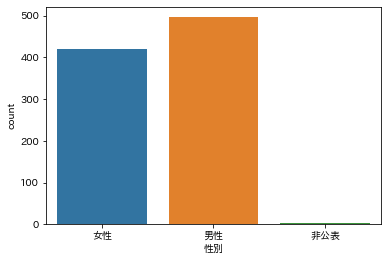

In [67]:
sns.countplot("性別", data=df) # 我々男性の方が感染してるぜ！

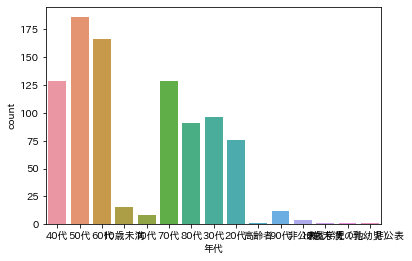

In [89]:
sns.countplot("年代", data=df, )# なんか見づらい。年代順に並んでいない。
# 以下、年代順に並べ替えるけど、難しかったらスルーで。

In [87]:
df["年代"].unique() # 年代の中にはどういうデータが入っているのか。

array(['40代', '50代', '60代', '10歳未満', '10代', '70代', '80代', '30代', '20代',
       '高齢者', '90代', '非公表', nan, '未就学児', '10歳未満（乳幼児）', 'その他・非公表'],
      dtype=object)

In [0]:
generation_order = ["その他・非公表", "非公表", np.nan, '10歳未満(乳幼児)', '10歳未満'] + [str(gen) + "代" for gen in np.arange(10, 100, 10)]# これはフォーマットが泣く泣く手入力で。一部リストの内包表記（要検索）

In [91]:
generation_order

['その他・非公表',
 '非公表',
 nan,
 '10歳未満(乳幼児)',
 '10歳未満',
 '10代',
 '20代',
 '30代',
 '40代',
 '50代',
 '60代',
 '70代',
 '80代',
 '90代']

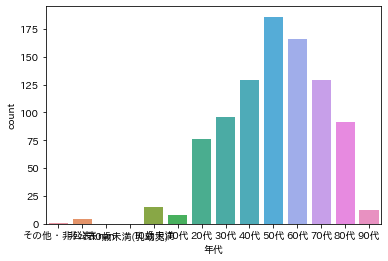

In [92]:
sns.countplot("年代", data=df, order=generation_order) # 年代が見づらい

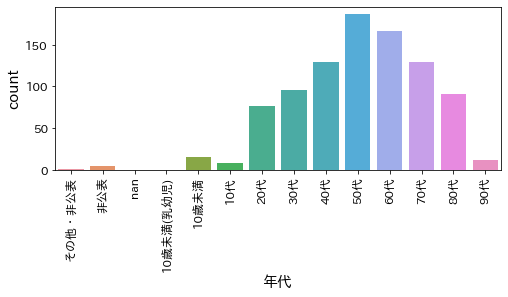

In [94]:
fig = plt.figure(figsize=(8, 3), facecolor='white')
ax = fig.add_subplot(111)
sns.countplot("年代", data=df, order=generation_order, ax=ax) # 年代が見づらい
ax.tick_params(which='major', labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
plt.show()
plt.close()

In [0]:
# かねこもまだ20代です。

### 時系列解析

In [0]:
new_patient = df['発熱観察日'].value_counts().sort_index()

In [98]:
new_patient # 2019年は恐らく誤記でしょう。

2019/03/05     1
2019/03/09     1
2020/01/03     1
2020/01/20     2
2020/01/21     1
2020/01/23     2
2020/01/24     2
2020/01/25     1
2020/01/26     1
2020/01/29     1
2020/01/30     1
2020/01/31     2
2020/02/01     2
2020/02/02     3
2020/02/03     6
2020/02/04     4
2020/02/05     5
2020/02/06     4
2020/02/07     4
2020/02/08     2
2020/02/09     1
2020/02/10     7
2020/02/12     7
2020/02/13     4
2020/02/14     7
2020/02/15     4
2020/02/16    10
2020/02/17    14
2020/02/18    15
2020/02/19    10
2020/02/20    16
2020/02/21    13
2020/02/22    14
2020/02/23    26
2020/02/24    23
2020/02/25    33
2020/02/26    21
2020/02/27    18
2020/02/28    27
2020/02/29    18
2020/03/01    32
2020/03/02    20
2020/03/03    29
2020/03/04    25
2020/03/05    23
2020/03/06    24
2020/03/07    29
2020/03/08    23
2020/03/09    30
2020/03/10    19
2020/03/11    19
2020/03/12    17
2020/03/13    17
2020/03/14     8
2020/03/15    10
2020/03/16     5
2020/03/17     8
2020/03/18     3
2020/03/19    

In [99]:
new_patient.index = new_patient.index.str.replace("2019", "2020")
new_patient.sort_index(inplace=True)
new_patient

2020/01/03     1
2020/01/20     2
2020/01/21     1
2020/01/23     2
2020/01/24     2
2020/01/25     1
2020/01/26     1
2020/01/29     1
2020/01/30     1
2020/01/31     2
2020/02/01     2
2020/02/02     3
2020/02/03     6
2020/02/04     4
2020/02/05     5
2020/02/06     4
2020/02/07     4
2020/02/08     2
2020/02/09     1
2020/02/10     7
2020/02/12     7
2020/02/13     4
2020/02/14     7
2020/02/15     4
2020/02/16    10
2020/02/17    14
2020/02/18    15
2020/02/19    10
2020/02/20    16
2020/02/21    13
2020/02/22    14
2020/02/23    26
2020/02/24    23
2020/02/25    33
2020/02/26    21
2020/02/27    18
2020/02/28    27
2020/02/29    18
2020/03/01    32
2020/03/02    20
2020/03/03    29
2020/03/04    25
2020/03/05    23
2020/03/05     1
2020/03/06    24
2020/03/07    29
2020/03/08    23
2020/03/09     1
2020/03/09    30
2020/03/10    19
2020/03/11    19
2020/03/12    17
2020/03/13    17
2020/03/14     8
2020/03/15    10
2020/03/16     5
2020/03/17     8
2020/03/18     3
2020/03/19    

In [100]:
new_patient.index = pd.to_datetime(new_patient.index) # datetime型というのがあります。時系列データは基本的にこれに変換してから図化します。
new_patient

2020-01-03     1
2020-01-20     2
2020-01-21     1
2020-01-23     2
2020-01-24     2
2020-01-25     1
2020-01-26     1
2020-01-29     1
2020-01-30     1
2020-01-31     2
2020-02-01     2
2020-02-02     3
2020-02-03     6
2020-02-04     4
2020-02-05     5
2020-02-06     4
2020-02-07     4
2020-02-08     2
2020-02-09     1
2020-02-10     7
2020-02-12     7
2020-02-13     4
2020-02-14     7
2020-02-15     4
2020-02-16    10
2020-02-17    14
2020-02-18    15
2020-02-19    10
2020-02-20    16
2020-02-21    13
2020-02-22    14
2020-02-23    26
2020-02-24    23
2020-02-25    33
2020-02-26    21
2020-02-27    18
2020-02-28    27
2020-02-29    18
2020-03-01    32
2020-03-02    20
2020-03-03    29
2020-03-04    25
2020-03-05    23
2020-03-05     1
2020-03-06    24
2020-03-07    29
2020-03-08    23
2020-03-09     1
2020-03-09    30
2020-03-10    19
2020-03-11    19
2020-03-12    17
2020-03-13    17
2020-03-14     8
2020-03-15    10
2020-03-16     5
2020-03-17     8
2020-03-18     3
2020-03-19    

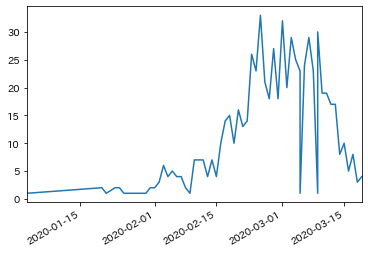

In [101]:
new_patient.plot()
